In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.measure import compare_psnr
from subprocess import call
from PIL import Image

plt.rcParams['figure.figsize'] = (10, 6)

In [35]:
def ensure_dir(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

# Generación aleatoria

### Corro el main para los distintos numeros de rayos

In [3]:
outputdirs = ["img_convertidas/output_slice001_disc_20/"]
inputdir = ["../../csvs/output-slice001.csv"]
discs = [20]
n_rayos = [x for x in range(1000, 5001, 500)] + [x for x in range(6000, 10001, 1000)] + [15000, 20000, 25000, 30000]

In [26]:
for idx, out in enumerate(outputdirs):
    print(out)
    for rayos in n_rayos:
        print(rayos)
        outputdir2 = out + "output_slice_001_{}_rayos_disc_{}.csv".format(rayos,discs[idx])
        call(["../../src/main", '-i', inputdir[idx], '-o', outputdir2, '-v', '3', '-d', str(discs[idx]), '-rayos', str(rayos), '-pixel', '1'])

img_convertidas/output_slice001_disc_20/
1000
1500
2000
2500
3000
3500
4000
4500
5000
6000
7000
8000
9000
10000
15000
20000
25000
30000


### Grafico resultados

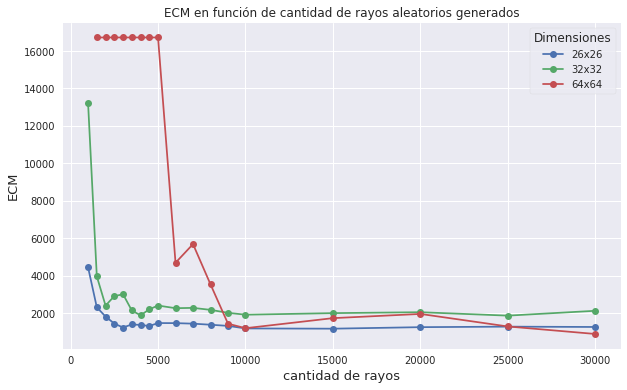

In [9]:
path_imgs = ["img_convertidas/output_slice001_disc_20/output_slice_001_{}_rayos_disc_20.csv".format(rayo) for rayo in n_rayos]
mserrors = []
original = np.genfromtxt("img_convertidas/output_slice001_disc_20/img_original.csv", delimiter=',').ravel()

for path in path_imgs:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        mse = mean_squared_error(original, reconstructed)
        mserrors.append(mse)
plt.plot(n_rayos, mserrors, marker='o', label="26x26")
        
path_imgs2 = ["img_convertidas/output_slice000_disc_16/output_slice_001_{}_rayos_disc_16.csv".format(rayo) for rayo in n_rayos]
original2 = np.genfromtxt("img_convertidas/output_slice000_disc_16/img_original.csv", delimiter=',').ravel()
mserrors2 = []

for path in path_imgs2:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        mse = mean_squared_error(original2, reconstructed)
        mserrors2.append(mse)
        
plt.plot(n_rayos, mserrors2, marker='o', label="32x32")

path_imgs3 = ["img_convertidas/output_slice001_disc_8/output_slice_001_{}_rayos_disc_8.csv".format(rayo) for rayo in n_rayos]
original3 = np.genfromtxt("img_convertidas/output_slice001_disc_8/img_original.csv", delimiter=',').ravel()
mserrors3 = []

for path in path_imgs3:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        mse = mean_squared_error(original3, reconstructed)
        mserrors3.append(mse)
        

plt.plot(n_rayos[1:], mserrors3[1:], marker='o', label="64x64")


plt.xlabel("cantidad de rayos", fontsize=13)
plt.ylabel("ECM", fontsize=13)
plt.title("ECM en función de cantidad de rayos aleatorios generados")
plt.legend(loc='best', title='Dimensiones', frameon=True, fancybox=True)
plt.show()


In [11]:
for idx, val in enumerate(mserrors2):
    print(n_rayos[idx], val)

1000 13220.8779296875
1500 3961.21484375
2000 2399.20703125
2500 2902.3310546875
3000 3005.0673828125
3500 2139.1142578125
4000 1877.6328125
4500 2200.0029296875
5000 2401.1923828125
6000 2259.1064453125
7000 2276.896484375
8000 2170.326171875
9000 2012.8154296875
10000 1911.2841796875
15000 1995.8916015625
20000 2044.9716796875
25000 1861.8837890625
30000 2120.8125


In [30]:
discs = range(20, 7, -1)
rayos = 1000
ecm_treshold = 3500

infile = "../../csvs/output-slice001.csv"
out = "img_convertidas/stopPoints/out.csv"
path_rec = "img_convertidas/stopPoints/orig_{}.csv"
stop_points = []

for d in discs:
    rayos = 1000
    original = np.genfromtxt(path_rec.format(d), delimiter=',').ravel()

    while True:
        print("disc: {} - rayos: {}".format(d, rayos))
        
        call(["../../src/main", '-i', infile, '-o', out, '-v', '1', '-d', str(d), '-rayos', str(rayos), '-pixel', '1'])
        reconstructed = np.genfromtxt(out, delimiter=',').ravel()
        
        if mean_squared_error(original, reconstructed) <= ecm_treshold:
            stop_points.append(rayos)
            break
        else:
            print("MSE: {}".format(mean_squared_error(original, reconstructed)))
            rayos += 2000

disc: 20 - rayos: 1000
MSE: 4446.9778106508875
disc: 20 - rayos: 3000
disc: 19 - rayos: 1000
MSE: 4556.385459533608
disc: 19 - rayos: 3000
disc: 18 - rayos: 1000
MSE: 4446.652794292509
disc: 18 - rayos: 3000
disc: 17 - rayos: 1000
MSE: 16623.497398543182
disc: 17 - rayos: 3000
MSE: 3606.618106139438
disc: 17 - rayos: 5000
MSE: 4062.0405827263266
disc: 17 - rayos: 7000
MSE: 3990.755463059313
disc: 17 - rayos: 9000
MSE: 4000.6711758584806
disc: 17 - rayos: 11000
MSE: 4072.146722164412
disc: 17 - rayos: 13000
MSE: 4130.023933402706
disc: 17 - rayos: 15000
MSE: 4067.7023933402706
disc: 17 - rayos: 17000
disc: 16 - rayos: 1000
MSE: 16626.0322265625
disc: 16 - rayos: 3000
disc: 15 - rayos: 1000
MSE: 16635.646530612245
disc: 15 - rayos: 3000
MSE: 4053.54693877551
disc: 15 - rayos: 5000
MSE: 3738.248979591837
disc: 15 - rayos: 7000
MSE: 4822.535510204081
disc: 15 - rayos: 9000
MSE: 3517.6204081632654
disc: 15 - rayos: 11000
disc: 14 - rayos: 1000
MSE: 16645.783053323594
disc: 14 - rayos: 3000


KeyboardInterrupt: 

In [94]:
outputdir = "img_convertidas/output_slice000_disc_16/conRuido/"
inputdir = "../../csvs/output-slice001.csv"
n_rayos = [x for x in range(1000, 5001, 500)] + [x for x in range(6000, 10001, 1000)] + [15000, 20000, 25000, 30000]

for rayos in n_rayos:
        print(rayos)
        outputdir2 = outputdir + "output_slice_001_{}_rayos_disc_16.csv".format(rayos)
        call(["../../src/main", '-i', inputdir, '-o', outputdir2, '-v', '1500', '-d', '16', '-rayos', str(rayos), '-pixel', '1'])

2000
2500
3000
3500
4000
4500
5000


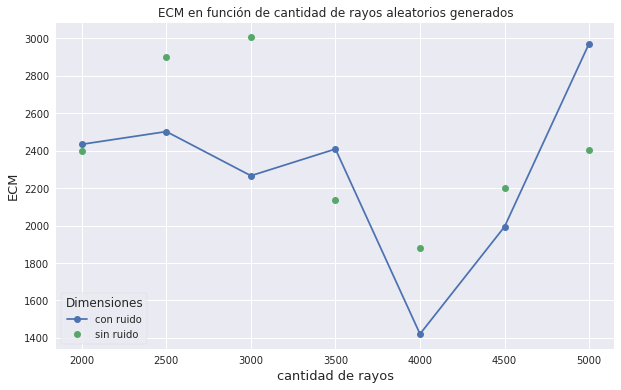

In [96]:
original2 = np.genfromtxt("img_convertidas/output_slice000_disc_16/img_original.csv", delimiter=',').ravel()


path_imgs = ["img_convertidas/output_slice000_disc_16/conRuido/output_slice_001_{}_rayos_disc_16.csv".format(rayo) for rayo in n_rayos]
mserrors = []

for path in path_imgs:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        mse = mean_squared_error(original2, reconstructed)
        mserrors.append(mse)
        
plt.plot(n_rayos, mserrors, marker='o', label="con ruido")

path_imgs2 = ["img_convertidas/output_slice000_disc_16/output_slice_001_{}_rayos_disc_16.csv".format(rayo) for rayo in n_rayos]
mserrors2 = []

for path in path_imgs2:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        mse = mean_squared_error(original2, reconstructed)
        mserrors2.append(mse)
        
plt.plot(n_rayos, mserrors2, 'o', label="sin ruido")


plt.xlabel("cantidad de rayos", fontsize=13)
plt.ylabel("ECM", fontsize=13)
plt.title("ECM en función de cantidad de rayos aleatorios generados")
plt.legend(loc='best', title='Dimensiones', frameon=True, fancybox=True)
plt.show()

In [91]:
for idx, val in enumerate(mserrors[1:]):
    print(val, mserrors2[idx+1])

3958.4111328125 3961.21484375
2365.46875 2399.20703125
2935.134765625 2902.3310546875
2901.6220703125 3005.0673828125
2185.3974609375 2139.1142578125
1787.7978515625 1877.6328125
2200.6875 2200.0029296875
2352.55078125 2401.1923828125
